In [67]:
from fit_system import TransitFit
import lightkurve as lk
import pandas as pd
import numpy as np
import os

In [17]:
fit = TransitFit(target_name='K2-152')

/Users/nksaunde/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/Users/nksaunde/anaconda3/lib/python3.6/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.140398e-18
  rval = scipy.linalg.solve(A, b)


optimizing logp for variables: ['t0', 'logP']
message: Optimization terminated successfully.
logp: -102.18185834280277 -> -102.18185834280277
optimizing logp for variables: ['mean', 'logr', 'r_star']
message: Optimization terminated successfully.
logp: -102.18185834280277 -> -102.18185834280268
optimizing logp for variables: ['r_star']
message: Optimization terminated successfully.
logp: -102.18185834280268 -> -102.18185834280268
optimizing logp for variables: ['mean', 't0', 'logP']
message: Optimization terminated successfully.
logp: -102.18185834280268 -> -102.18185834280268
optimizing logp for variables: ['mean', 'logr', 'r_star']
message: Optimization terminated successfully.
logp: -102.18185834280268 -> -102.18185834280268
optimizing logp for variables: ['logs2', 'logP', 'logr', 'b_interval__', 'u_quadlimbdark__', 't0', 'm_star', 'r_star', 'mean']
message: Optimization terminated successfully.
logp: -102.18185834280268 -> -102.18064205448108


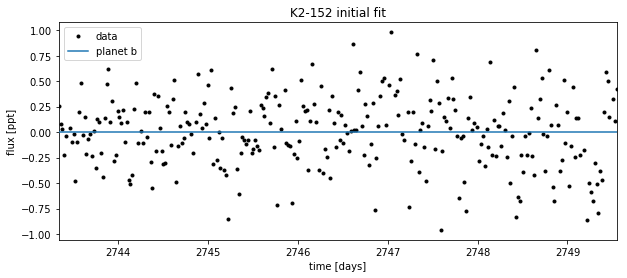

In [18]:
fit.test_fit()

In [20]:
tpf = lk.search_targetpixelfile('K2-152').download()

/Users/nksaunde/Documents/Github/lightkurve/lightkurve/search.py:142: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


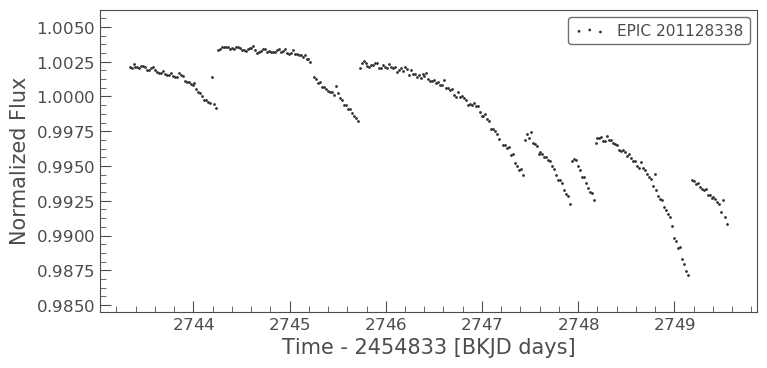

In [50]:
lc = tpf.to_lightcurve(aperture_mask='threshold')
lc.scatter()

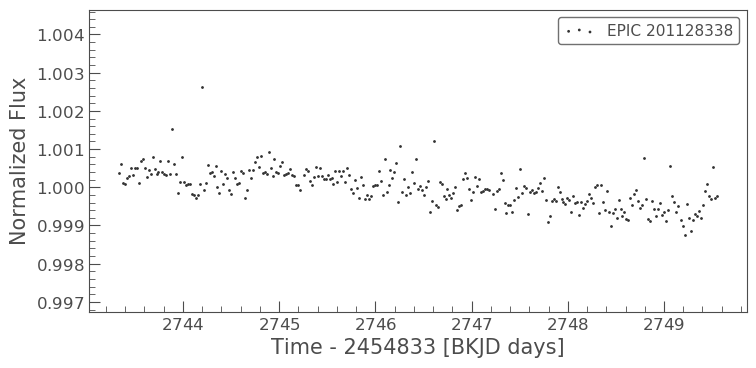

In [23]:
clc = tpf.to_corrector('pld').correct()
clc.scatter()

In [28]:
data = pd.read_csv(os.path.join('data', 'planets_2019.04.02_11.43.16.csv'), skiprows=range(81))

In [40]:
target='K2-152'
row = data[data['pl_hostname']==target]
t0 = row['pl_tranmid'].values[0] - 2454833
per = row['pl_orbper'].values[0]

In [37]:
trn_mask = fit.get_transit_mask(tpf.time, t0, per, 0.5)

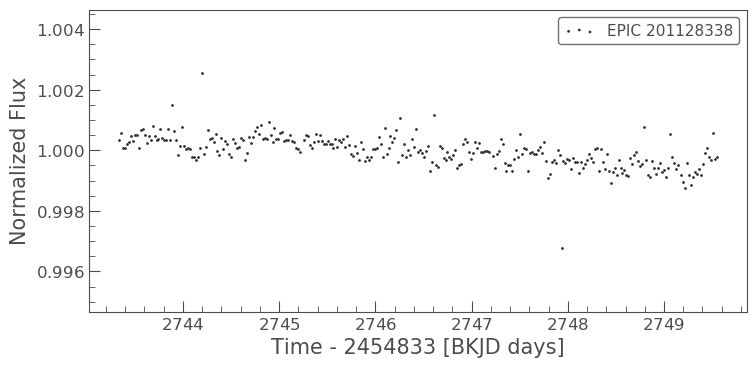

In [42]:
clc = tpf.to_corrector('pld').correct(cadence_mask=~trn_mask)
clc.scatter()

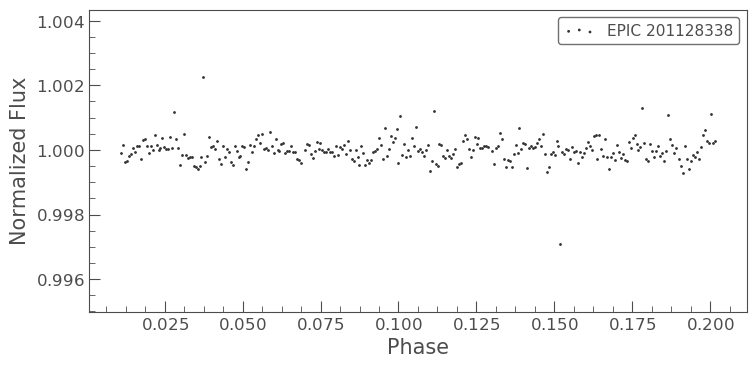

In [45]:
clc.flatten().fold(per, t0).scatter()

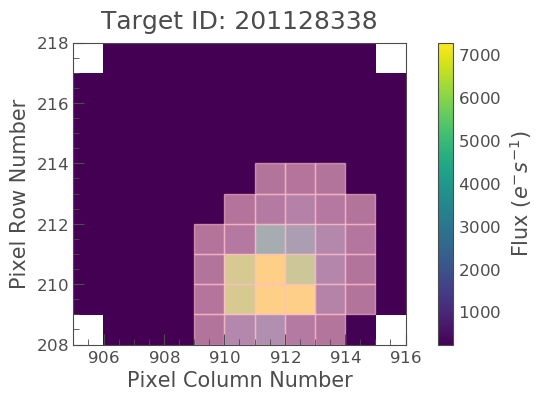

In [62]:
tpf.plot(aperture_mask='threshold')

In [51]:
tpf.campaign

101

In [61]:
lk.utils.KeplerQualityFlags.decode(8192)

['Cosmic ray in collateral data']

In [74]:
np.sum(tpf._parse_aperture_mask('pipeline'), axis=(0,1))

0